In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import numpy as np
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

## 3 -> red,green,blue channels

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
y_train_rs=np.resize(y_train,(50000,))
y_test_rs=np.resize(y_test,(10000,))

In [ ]:
print(y_train)
print(y_train_rs.shape)

print(y_train_rs)
print(y_train_rs.shape)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000,)
[6 9 9 ... 9 1 1]
(50000,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Assuming you already have your image data loaded into 'X_train' and 'y_train' arrays

# Create an instance of the ImageDataGenerator class
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotation between -20 and 20 degrees
    width_shift_range=0.2,  # Randomly shift the width by a factor of 0.2
    height_shift_range=0.2,  # Randomly shift the height by a factor of 0.2
    shear_range=0.2,  # Shear the image by a random factor of 0.2
    zoom_range=0.2,  # Randomly zoom by a factor of 0.2
    horizontal_flip=True,  # Randomly flip the image horizontally
    fill_mode='nearest'  # Fill any missing pixels with the nearest value
)

# Generate augmented images
augmented_images = []
augmented_labels = []
with tf.device(device_name):
  for i in range(len(X_train)):
      img = X_train[i]
      label = y_train[i]
      img = img.reshape((1,) + img.shape)  # Reshape the image to (1, height, width, channels)
      j = 0
      for batch in datagen.flow(img, batch_size=1):
          augmented_images.append(batch[0])
          augmented_labels.append(label)
          j += 1
          if j >= 3:  # Generate 5 augmented images for each original image
              break

# Convert the augmented images and labels to numpy arrays
X_train = np.array(augmented_images)
y_train = np.array(augmented_labels)


In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
train_labels_a=y_train.reshape(-1, 1)
enc.fit(train_labels_a)

onehotlabels = enc.transform(train_labels_a).toarray()
print(onehotlabels.shape)
print(y_train[1])
print(onehotlabels[1])

train_labels=onehotlabels

(150000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
enc = preprocessing.OneHotEncoder()
test_labels_a=y_test.reshape(-1, 1)
enc.fit(test_labels_a)

onehotlabels_test = enc.transform(test_labels_a).toarray()
print(onehotlabels_test.shape)
print(y_test[1])

print(onehotlabels_test[1])

test_labels=onehotlabels_test

(10000, 10)
[8]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


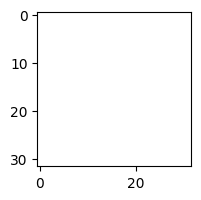

In [ ]:
## plotting image
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,2)
image=X_train[5]
plt.imshow(image)
plt.show()

In [ ]:
import tensorflow as tf

# convert class vectors to binary class matrices
num_classes=10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

'''
a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
print(a)

[[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]]
'''

'\na = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)\nprint(a)\n\n[[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[0 0 0 1]]\n'

    Input   CNN-1       (2,2)MaxPool1   CNN-2     (2,2)MaxPool2  FLATTEN  HL-1    Output
  (32,32,3) (32,32,3,32) (16,16,3,32) (16,16,2,64) (8,8,2,64)                 

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout

X_train=X_train/255 ## because pixel range is (0,255) and we want to normalize it to (0,1) for faster training
X_test=X_test/255

input_shape=(32,32,3)
model=Sequential()

model.add(Conv2D( 128 , (3,3) , strides=(1,1) , padding='same' , input_shape= input_shape , activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=None))

model.add(Conv2D( 128 , (3,3) , strides=(1,1) , padding='same' , activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=None))

model.add(Conv2D( 128 , (3,3) , strides=(1,1) , padding='same' , activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=None))


model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))


Epoch 1/20
3750/3750 [==============================] - 40s 7ms/step - loss: 1.4961 - accuracy: 0.4586 - val_loss: 1.2379 - val_accuracy: 0.5620
Epoch 2/20
3750/3750 [==============================] - 24s 6ms/step - loss: 1.1474 - accuracy: 0.5921 - val_loss: 1.0561 - val_accuracy: 0.6256
Epoch 3/20
3750/3750 [==============================] - 25s 7ms/step - loss: 0.9806 - accuracy: 0.6527 - val_loss: 1.0764 - val_accuracy: 0.6236
Epoch 4/20
3750/3750 [==============================] - 25s 7ms/step - loss: 0.8654 - accuracy: 0.6954 - val_loss: 0.9391 - val_accuracy: 0.6740
Epoch 5/20
3750/3750 [==============================] - 24s 7ms/step - loss: 0.7680 - accuracy: 0.7297 - val_loss: 0.9115 - val_accuracy: 0.6884
Epoch 6/20
3750/3750 [==============================] - 25s 7ms/step - loss: 0.6837 - accuracy: 0.7596 - val_loss: 0.8881 - val_accuracy: 0.6967
Epoch 7/20
3750/3750 [==============================] - 24s 6ms/step - loss: 0.6093 - accuracy: 0.7848 - val_loss: 0.8545 - val_ac

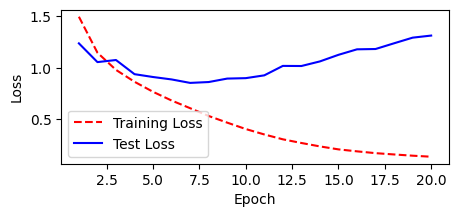

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [ ]:
model.compile(loss='categorical_crossentropy',
              #optimizer='adam',
              optimizer=tf.keras.optimizers.Adam(learning_rate=(1e-3)/4),
              metrics=['accuracy'])

with tf.device(device_name):
  history= model.fit(X_train,y_train ,batch_size=32,validation_split=0.2,epochs=20)

## The batch size depicts the number of samples that propagate through the neural network before updating the model parameters.
## Each batch of samples goes through one full forward and one full backward propagation.

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

model.summary()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.2085926532745361
Test accuracy: 0.7602999806404114


In [ ]:
#Added dense layer 128, 128, 128 ,flatten , dense-512, dense-output-10 -- learning rate (1e-3)/8


# Test loss: 0.7715660333633423
# Test accuracy: 0.7372999787330627

In [ ]:
#Added dense layer 128, 128, 128 ,flatten , dense-512, dense-output-10 , learning rate (1e-3)/4
# Test loss: 0.7137531042098999
# Test accuracy: 0.7669000029563904
# The reason is that convolutional layers try to extract features in a differentiable manner, and fully connected layers try to classify
# the features. Consequently, adding more layers to the dense section can empower your network's ability to classify the extracted features better.


##Below image for loss VS epoch graph

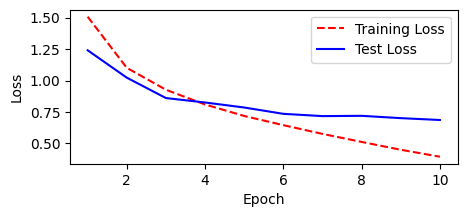

In [ ]:
# with pooling stride none
#Test loss: 1.256853461265564
#Test accuracy: 0.5770000219345093

# with pooling stride (1,1)
#Test loss: 469.9234619140625
#Test accuracy: 0.4242999851703644

# with pooling stride none, learning rate (1e-3), CNN with 64 and 64 units
# Test loss: 171.89736938476562
# Test accuracy: 0.4867999851703644

# with pooling stride none, learning rate (1e-3)/2, CNN with 64 and 64 units
# Test loss: 200.59030151367188
# Test accuracy: 0.5022000074386597

# with pooling stride none, learning rate (1e-3)/4, CNN with 64 and 128 units
# Test loss: 139.72500610351562
# Test accuracy: 0.6215000152587891

# with pooling stride none, learning rate (1e-3)/4, CNN with 32, 64 and 128 units
# Test loss: 147.02127075195312
# Test accuracy: 0.6215000152587891

# with pooling stride none, learning rate (1e-3)/4, CNN with 128, 64 and 32 units
# Test loss: 146.09669494628906
# Test accuracy: 0.5444999933242798

# with pooling stride none, learning rate (1e-3)/4, CNN with 128, 128 and 128 units
# Test loss: 142.669921875
# Test accuracy: 0.6223000288009644
